## Dataset Overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MiniProject/transcript_clean.csv")

In [ ]:
df_text = df[['phrase', 'prompt']]
df_text

,phrase,prompt
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Back pain
2,there is too much pain when i move my arm,Joint pain
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Back pain
...,...,...
6655,I feel a burning sensation in my guts about 2 ...,Stomach ache
6656,I have a split on my thumb that will not heal.,Open wound
6657,I feel a lot of pain in the joints.,Joint pain
6658,The area around my heart doesn't feel good.,Heart hurts


In [ ]:
df.columns

Index(['Unnamed: 0', 'audio_clipping', 'audio_clipping:confidence',
       'background_noise_audible', 'background_noise_audible:confidence',
       'overall_quality_of_the_audio', 'quiet_speaker',
       'quiet_speaker:confidence', 'speaker_id', 'file_download', 'file_name',
       'phrase', 'writer_id', 'prompt'],
      dtype='object')

In [ ]:
# Check the distribution of phrases and prompts
print("Unique phrases:", df['phrase'].nunique())
print("Unique prompts:", df['prompt'].nunique())
print("Unique speakers:", df['speaker_id'].nunique())

Unique phrases: 706
Unique prompts: 25
Unique speakers: 124


## Pandas profiling

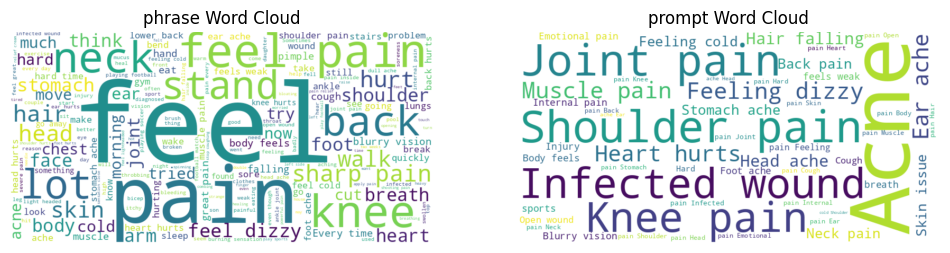

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all phrase and prompt into a single string
phrase_text = ' '.join(df['phrase'])
prompt_text = ' '.join(df['prompt'])

# Generate word clouds
phrase_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phrase_text)
prompt_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(prompt_text)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(phrase_wordcloud, interpolation='bilinear')
plt.title('phrase Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prompt_wordcloud, interpolation='bilinear')
plt.title('prompt Word Cloud')
plt.axis('off')

plt.show()


In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# from pandas_profiling import ProfileReport
# from ydata_profiling import ProfileReport
# profile=ProfileReport(df)
# profile.to_file("pandas_profile.html")

## NLP EDA (Apploying GloVe)

In [ ]:
df_text = df[['phrase', 'prompt']]
df_text

,phrase,prompt
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Back pain
2,there is too much pain when i move my arm,Joint pain
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Back pain
...,...,...
6655,I feel a burning sensation in my guts about 2 ...,Stomach ache
6656,I have a split on my thumb that will not heal.,Open wound
6657,I feel a lot of pain in the joints.,Joint pain
6658,The area around my heart doesn't feel good.,Heart hurts


In [ ]:
df_text=df_text.drop_duplicates()

In [ ]:
# download glove and unzip it in Notebook.
# Source GFG
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2024-03-29 18:07:16--  https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/v0.9.2 [following]
--2024-03-29 18:07:16--  https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/v0.9.2
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘v0.9.2.zip’

v0.9.2.zip              [  <=>               ]   4.17M  15.3MB/s    in 0.3s    

2024-03-29 18:07:17 (15.3 MB/s) - ‘v0.9.2.zip’ saved [4369852]



In [ ]:
!pip install nltk

ERROR: Could not find a version that satisfies the requirement wordweb (from versions: none)
ERROR: No matching distribution found for wordweb


In [ ]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from gensim.models import KeyedVectors

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load stopwords
stopwords_set = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text, glove_model, stopwords_set):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and out-of-vocabulary tokens
    tokens = [word for word in tokens if word not in stopwords_set and word in glove_model.key_to_index]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

>Loading GloVe

In [ ]:
from gensim.models import KeyedVectors

# Path to the GloVe embeddings file
glove_file = 'glove.6B.300d.txt'  # Change this to the file you want to use

# Load the GloVe model
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

KeyboardInterrupt: 

In [ ]:
# Check if the word 'hello' is in the vocabulary
if 'hello' in glove_model.key_to_index:
    print("Word 'hello' is in the vocabulary.")
else:
    print("Word 'hello' is NOT in the vocabulary.")


Word 'hello' is in the vocabulary.


>Extracting cleaned data

In [ ]:
# Apply preprocess_text function to 'phrase' column and create 'clean_phrase' column
df_text['clean_phrase'] = df_text['phrase'].apply(lambda x: preprocess_text(x, glove_model, stopwords_set))

# Apply preprocess_text function to 'prompt' column and create 'clean_prompt' column
df_text['clean_prompt'] = df_text['prompt'].apply(lambda x: preprocess_text(x, glove_model, stopwords_set))

<ipython-input-61-985d265e3875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['clean_phrase'] = df_text['phrase'].apply(lambda x: preprocess_text(x, glove_model, stopwords_set))
<ipython-input-61-985d265e3875>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['clean_prompt'] = df_text['prompt'].apply(lambda x: preprocess_text(x, glove_model, stopwords_set))


In [ ]:
df_clean = df_text[['clean_phrase', 'clean_prompt']]
df_clean

,clean_phrase,clean_prompt
0,remember feel,emotional pain
1,carry heavy things feel like breaking back,back pain
2,much pain move arm,joint pain
3,son lip pierced swollen skin inside lip grey l...,infected wound
4,muscles lower back aching,back pain
...,...,...
2649,feel like heart fire,heart hurts
2709,lift arms soreness shoulders,shoulder pain
2714,feel clicking sensation knee time step,joint pain
2966,surgical wound infections,infected wound


## Final preprocessing before designing ANN

In [ ]:
vocab = set()

# Tokenize and add words from 'clean_phrase' column
for text in df_text['clean_phrase']:
    tokens = text.split()
    vocab.update(tokens)

# Tokenize and add words from 'clean_prompt' column
for text in df_text['clean_prompt']:
    tokens = text.split()
    vocab.update(tokens)

vocab = list(vocab)


In [ ]:
vocab_size = len(vocab)
embedding_dim = 300 # As using 300 dimension GloVe vectors

In [ ]:
# Initialize an empty matrix for the embedding matrix
import numpy as np
glove_embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill the embedding matrix with GloVe vectors for words in the vocabulary
for i, word in enumerate(vocab):
    if word in glove_model.key_to_index:
        glove_embedding_matrix[i] = glove_model.get_vector(word)

glove_embedding_matrix

array([[-0.0064302 , -0.29674   ,  0.35980999, ...,  0.58486003,
        -0.1911    ,  0.66562998],
       [-0.47018   ,  0.13719   , -0.092764  , ...,  0.18094   ,
         0.24635001, -0.042494  ],
       [-0.086882  , -0.34542   , -0.23156001, ...,  0.14241   ,
        -0.34862   , -0.084212  ],
       ...,
       [-0.31200001,  0.27465001, -0.41683999, ...,  0.0047412 ,
        -0.37865001,  0.073467  ],
       [-0.23284   ,  0.17667   , -0.042362  , ...,  0.55857998,
        -0.026189  ,  0.28163999],
       [-0.84085   ,  0.32806   ,  0.41549   , ...,  0.0094921 ,
         0.083019  , -0.051964  ]])

## Designing ANN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Instantiate a Tokenizer for clean_phrase
tokenizer_phrase = Tokenizer()
tokenizer_phrase.fit_on_texts(df_text['clean_phrase'])

# Instantiate a Tokenizer for clean_prompt
tokenizer_prompt = Tokenizer()
tokenizer_prompt.fit_on_texts(df_text['clean_prompt'])

# Convert 'clean_phrase' and 'clean_prompt' to sequences
sequences_phrase = tokenizer_phrase.texts_to_sequences(df_text['clean_phrase'])
sequences_prompt = tokenizer_prompt.texts_to_sequences(df_text['clean_prompt'])

In [ ]:
# Find the maximum sequence length in clean_phrase and clean_prompt
max_seq_length_phrase = max(len(seq) for seq in sequences_phrase)
max_seq_length_prompt = max(len(seq) for seq in sequences_prompt)

# Choose the maximum between the two
max_seq_length = max(max_seq_length_phrase, max_seq_length_prompt)

print("Max sequence length:", max_seq_length)

Max sequence length: 14


In [ ]:
# Split data into training and validation sets
X_train_phrase, X_val_phrase, y_train, y_val = train_test_split(sequences_phrase, df_text['clean_prompt'], test_size=0.2, random_state=42)

# Pad sequences to ensure uniform length
X_train_phrase = pad_sequences(X_train_phrase, maxlen=max_seq_length)
X_val_phrase = pad_sequences(X_val_phrase, maxlen=max_seq_length)

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

## Evaluating model accuracy

>Model 1

In [ ]:
# Define your ANN model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[glove_embedding_matrix],
                    input_length=max_seq_length,
                    trainable=False))

# Flatten the embedding output
model.add(Flatten())

# Add hidden dense layer
model.add(Dense(256, activation='relu'))

# Add output layer
num_classes = len(df_text['clean_prompt'].unique())  # Number of unique prompts
model.add(Dense(num_classes, activation='softmax'))

# Compile model with Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
# Train model
history = model.fit(X_train_phrase, y_train_encoded, batch_size=32, epochs=100, validation_data=(X_val_phrase, y_val_encoded))

# Evaluate model
loss, accuracy = model.evaluate(X_val_phrase, y_val_encoded)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

Epoch 1/100
18/18 [==============================] - 1s 20ms/step - loss: 3.4188 - accuracy: 0.0656 - val_loss: 3.3021 - val_accuracy: 0.0493
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 2.6528 - accuracy: 0.2872 - val_loss: 3.0983 - val_accuracy: 0.1408
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 2.0385 - accuracy: 0.5585 - val_loss: 3.0655 - val_accuracy: 0.1901
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 1.5632 - accuracy: 0.6879 - val_loss: 2.8853 - val_accuracy: 0.2042
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 1.1624 - accuracy: 0.7660 - val_loss: 2.7018 - val_accuracy: 0.2887
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.9079 - accuracy: 0.8351 - val_loss: 2.6256 - val_accuracy: 0.2676
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6300 - accuracy: 0.9273 - val_loss: 2.5011 - val_accuracy: 0.3239
Epoch 8/100


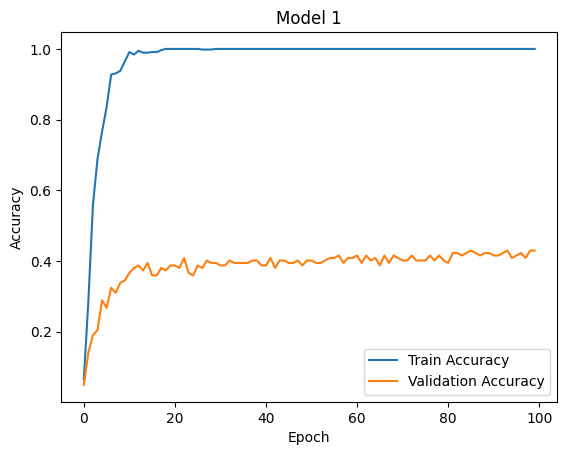

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 1')
plt.legend()
plt.show()

>Model 2

In [ ]:
from tensorflow.keras.layers import Dropout

# ANN model2 with dropout and early stopping
model2 = Sequential()

# Add embedding layer
model2.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[glove_embedding_matrix],
                    input_length=max_seq_length,
                    trainable=False))

# Add dropout layer
model2.add(Dropout(0.5))

# Flatten the embedding output
model2.add(Flatten())

# Add hidden dense layer
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

# Add output layer
model2.add(Dense(num_classes, activation='softmax'))

# Compile model2 with Adam optimizer
model2.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model2 with dropout and early stopping
history = model2.fit(X_train_phrase, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_phrase, y_val_encoded), callbacks=[early_stopping])

# Evaluate model2
loss, accuracy = model2.evaluate(X_val_phrase, y_val_encoded)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 3.5952 - accuracy: 0.0479 - val_loss: 3.2090 - val_accuracy: 0.0704
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 3.1313 - accuracy: 0.0957 - val_loss: 3.2096 - val_accuracy: 0.0423
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 2.9889 - accuracy: 0.1418 - val_loss: 3.1892 - val_accuracy: 0.0423
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 2.8597 - accuracy: 0.1968 - val_loss: 3.1683 - val_accuracy: 0.0493
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 2.6873 - accuracy: 0.2234 - val_loss: 3.1184 - val_accuracy: 0.0845
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 2.5456 - accuracy: 0.2837 - val_loss: 3.0643 - val_accuracy: 0.1831
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 2.3710 - accuracy: 0.3121 - val_loss: 2.9431 - val_accuracy: 0.2042
Epoch 8/100


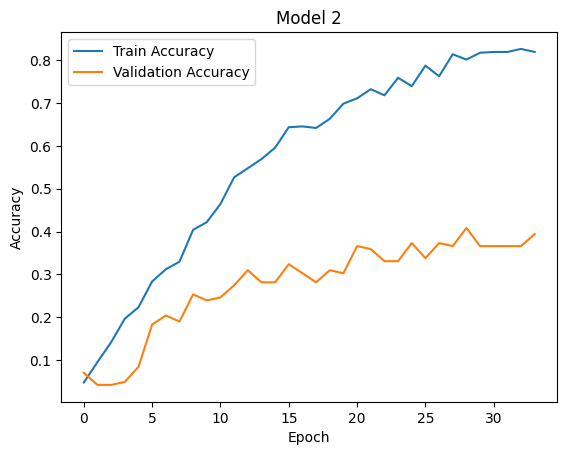

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 2')
plt.legend()
plt.show()

>Model 3

In [ ]:
from tensorflow.keras import regularizers

# Define your ANN model3 with adjusted dropout rate and L2 regularization
model3 = Sequential()

# Add embedding layer
model3.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[glove_embedding_matrix],
                    input_length=max_seq_length,
                    trainable=False))

# Add dropout layer with adjusted rate
model3.add(Dropout(0.3))  # Adjusted dropout rate

# Flatten the embedding output
model3.add(Flatten())

# Add hidden dense layer with L2 regularization
model3.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization added

# Add dropout layer with adjusted rate
model3.add(Dropout(0.3))  # Adjusted dropout rate

# Add output layer
model3.add(Dense(num_classes, activation='softmax'))

# Compile model3 with Adam optimizer
model3.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model3 with adjusted dropout rate, L2 regularization, and early stopping
history = model3.fit(X_train_phrase, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_phrase, y_val_encoded), callbacks=[early_stopping])

# Evaluate model3
loss, accuracy = model3.evaluate(X_val_phrase, y_val_encoded)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 3.9172 - accuracy: 0.0567 - val_loss: 3.7065 - val_accuracy: 0.0563
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 3.3919 - accuracy: 0.1631 - val_loss: 3.6313 - val_accuracy: 0.0634
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 2.9907 - accuracy: 0.3085 - val_loss: 3.4505 - val_accuracy: 0.1338
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 2.7066 - accuracy: 0.4078 - val_loss: 3.4949 - val_accuracy: 0.1338
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 2.3125 - accuracy: 0.5053 - val_loss: 3.2118 - val_accuracy: 0.2324
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 2.0180 - accuracy: 0.5780 - val_loss: 3.2607 - val_accuracy: 0.2042
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 1.8732 - accuracy: 0.6046 - val_loss: 3.0731 - val_accuracy: 0.2324
Epoch 8/100

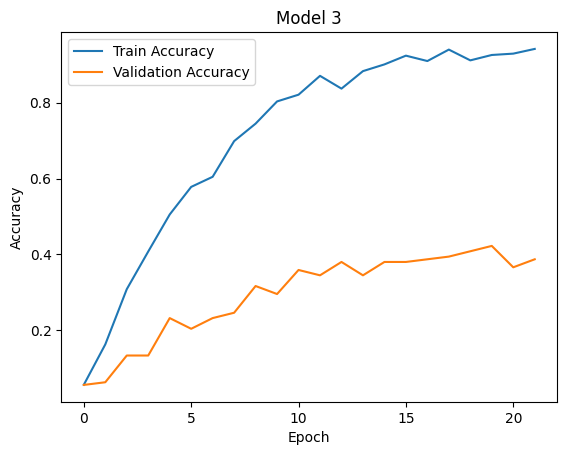

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 3')
plt.legend()
plt.show()

>Model 4

In [ ]:
from tensorflow.keras.layers import Dropout

# Define your ANN model4 with additional hidden layers
model4 = Sequential()

# Add embedding layer
model4.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[glove_embedding_matrix],
                    input_length=max_seq_length,
                    trainable=False))

# Add dropout layer
model4.add(Dropout(0.3))

# Flatten the embedding output
model4.add(Flatten())

# Add hidden dense layers
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))

# Add output layer
model4.add(Dense(num_classes, activation='softmax'))

# Compile model4 with Adam optimizer
model4.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model4 with adjusted architecture and early stopping
history = model4.fit(X_train_phrase, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_phrase, y_val_encoded), callbacks=[early_stopping])

# Evaluate model4
loss, accuracy = model4.evaluate(X_val_phrase, y_val_encoded)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 3.5594 - accuracy: 0.0621 - val_loss: 3.2542 - val_accuracy: 0.0493
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 3.2111 - accuracy: 0.0887 - val_loss: 3.2183 - val_accuracy: 0.0563
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 3.0202 - accuracy: 0.1401 - val_loss: 3.1364 - val_accuracy: 0.0634
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 2.8707 - accuracy: 0.1950 - val_loss: 3.0828 - val_accuracy: 0.1338
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 2.6590 - accuracy: 0.2642 - val_loss: 3.0518 - val_accuracy: 0.1127
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 2.4600 - accuracy: 0.3298 - val_loss: 3.0756 - val_accuracy: 0.1690
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 2.1658 - accuracy: 0.3918 - val_loss: 2.9525 - val_accuracy: 0.1972
Epoch 8/100


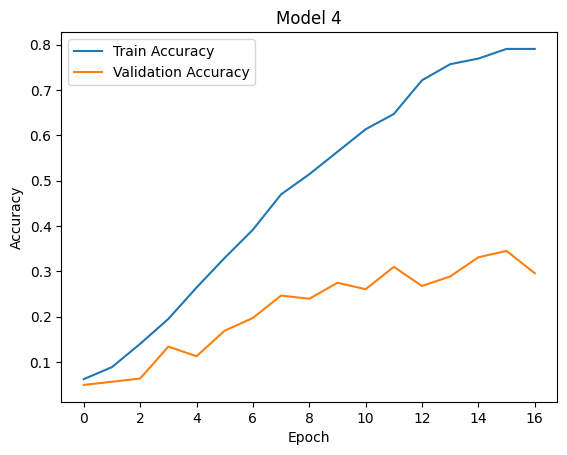

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 4')
plt.legend()
plt.show()

>Model 5

Epoch 1/100
18/18 [==============================] - 9s 88ms/step - loss: 3.8428 - accuracy: 0.0461 - val_loss: 3.3055 - val_accuracy: 0.0352
Epoch 2/100
18/18 [==============================] - 0s 16ms/step - loss: 3.5845 - accuracy: 0.0762 - val_loss: 3.2510 - val_accuracy: 0.0352
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 3.1913 - accuracy: 0.1401 - val_loss: 3.1530 - val_accuracy: 0.1268
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 2.7202 - accuracy: 0.2677 - val_loss: 3.0588 - val_accuracy: 0.3944
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 2.1978 - accuracy: 0.4326 - val_loss: 2.9603 - val_accuracy: 0.3803
Epoch 6/100
18/18 [==============================] - 0s 15ms/step - loss: 1.9448 - accuracy: 0.4894 - val_loss: 2.8835 - val_accuracy: 0.4930
Epoch 7/100
18/18 [==============================] - 0s 16ms/step - loss: 1.6792 - accuracy: 0.5851 - val_loss: 2.8075 - val_accuracy: 0.5000
Epoch 

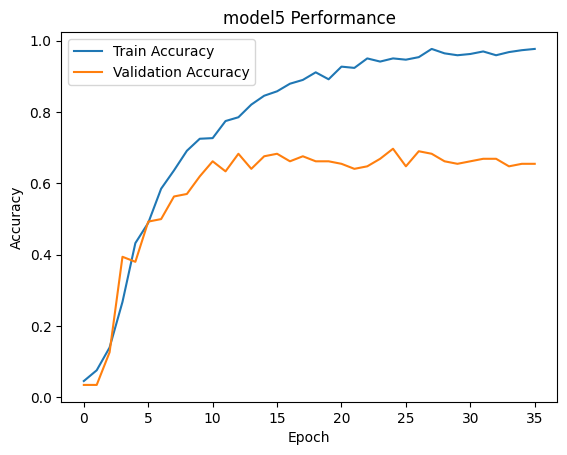

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the model5
model5 = Sequential()

# Add embedding layer
model5.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[glove_embedding_matrix],
                    input_length=max_seq_length,
                    trainable=False))

# Add LSTM layers
model5.add(LSTM(128, return_sequences=True))
model5.add(Dropout(0.5))
model5.add(LSTM(64))
model5.add(Dropout(0.5))

# Add batch normalization
model5.add(BatchNormalization())

# Add output layer
model5.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001)))

# Compile model5 with Adam optimizer and learning rate schedule
optimizer = Adam(learning_rate=0.001)
model5.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model5
history = model5.fit(X_train_phrase, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_phrase, y_val_encoded), callbacks=[early_stopping])

# Evaluate model5
loss, accuracy = model5.evaluate(X_val_phrase, y_val_encoded)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('model5 Performance')
plt.legend()
plt.show()


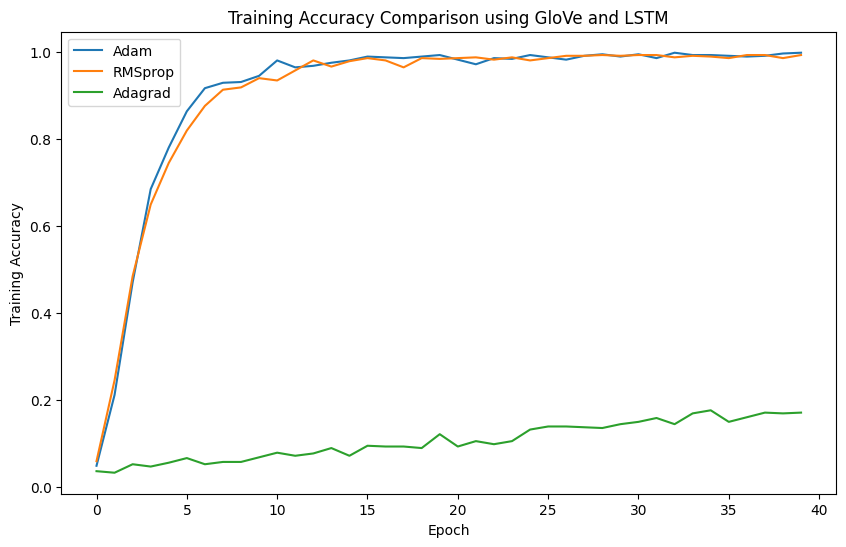

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop, Adagrad
import matplotlib.pyplot as plt

def create_model(optimizer):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        weights=[glove_embedding_matrix],
                        input_length=max_seq_length,
                        trainable=False))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train model with different optimizers
optimizers = [Adam(), RMSprop(), Adagrad()]
optimizer_names = ['Adam', 'RMSprop', 'Adagrad']
history_dict = {}

for optimizer, name in zip(optimizers, optimizer_names):
    model = create_model(optimizer)
    history = model.fit(X_train_phrase, y_train_encoded, batch_size=16, epochs=40,
                        validation_data=(X_val_phrase, y_val_encoded),
                        verbose=0)
    history_dict[name] = history.history['accuracy']

# Plot training history for different optimizers
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy in history_dict.items():
    plt.plot(accuracy, label=optimizer_name)

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison using GloVe and LSTM')
plt.legend()
plt.show()


## Saving model

In [ ]:
model5.save("model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model output testing

In [ ]:
# Function to preprocess user input
def preprocess_input(text, glove_model, stopwords_set, max_seq_length):
    # Clean and tokenize input text
    clean_text = preprocess_text(text, glove_model, stopwords_set)
    sequences = tokenizer.texts_to_sequences([clean_text])
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)
    return padded_sequences

# Function to predict symptom based on user input
def predict_symptom(user_input, model, glove_model, stopwords_set, max_seq_length):
    preprocessed_input = preprocess_input(user_input, glove_model, stopwords_set, max_seq_length)
    predictions = model.predict(preprocessed_input)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the index of the class with the highest probability
    return predicted_class_index

# Example usage:
user_input = "I'm feeling chest pain and shortness of breath."
predicted_class_index = predict_symptom(user_input, model5, glove_model, stopwords_set, max_seq_length)
predicted_symptom = df_text['prompt'].unique()[predicted_class_index]
print("Predicted Symptom:", predicted_symptom)


1/1 [==============================] - 0s 56ms/step
Predicted Symptom: Internal pain


In [ ]:
# Example usage:
user_input = "I'm feeling an unknown pain inside my foreleg."
predicted_class_index = predict_symptom(user_input, model5, glove_model, stopwords_set, max_seq_length)
predicted_symptom = df_text['prompt'].unique()[predicted_class_index]
print("Predicted Symptom:", predicted_symptom)

1/1 [==============================] - 0s 39ms/step
Predicted Symptom: Feeling cold


In [ ]:
import numpy as np

# Function to preprocess user input
def preprocess_input(text, glove_model, stopwords_set, max_seq_length):
    # Clean and tokenize input text
    clean_text = preprocess_text(text, glove_model, stopwords_set)
    sequences = tokenizer.texts_to_sequences([clean_text])
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)
    return padded_sequences

# Function to predict top 3 symptoms based on user input
def predict_top3_symptoms(user_input, model, glove_model, stopwords_set, max_seq_length):
    preprocessed_input = preprocess_input(user_input, glove_model, stopwords_set, max_seq_length)
    predictions = model.predict(preprocessed_input)
    top3_indices = np.argsort(predictions[0])[::-1][:3]  # Get indices of top 3 classes with highest probabilities
    top3_symptoms = [df_text['prompt'].unique()[idx] for idx in top3_indices]  # Map indices to symptom prompts
    return top3_symptoms

# Example usage:
user_input = "I'm feeling chest pain and shortness of breath."
top3_symptoms = predict_top3_symptoms(user_input, model5, glove_model, stopwords_set, max_seq_length)
print("Top 3 Predicted Symptoms:")
for i, symptom in enumerate(top3_symptoms):
    print(f"{i+1}. {symptom}")


1/1 [==============================] - 0s 34ms/step
Top 3 Predicted Symptoms:
1. Hard to breath
2. Body feels weak
3. Internal pain
